# Load dataset

In [3]:
import pylab as pl
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

(400, 4096)

# Visualize

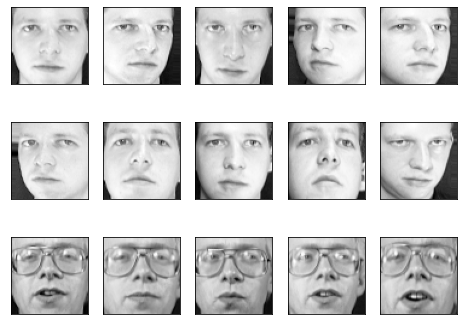

In [15]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,6))
for i in range(15):
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap='Greys_r')

# Train-test split (optional)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


# Preprocessing using PCA

In [70]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=300, whiten=True)
pca.fit(X_train)

PCA(n_components=300, whiten=True)

# Mean face (optional)

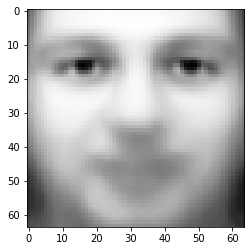

In [71]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.Greys_r)

In [72]:
print(pca.components_.shape)  # number of components

(300, 4096)


# Visualize the principal components

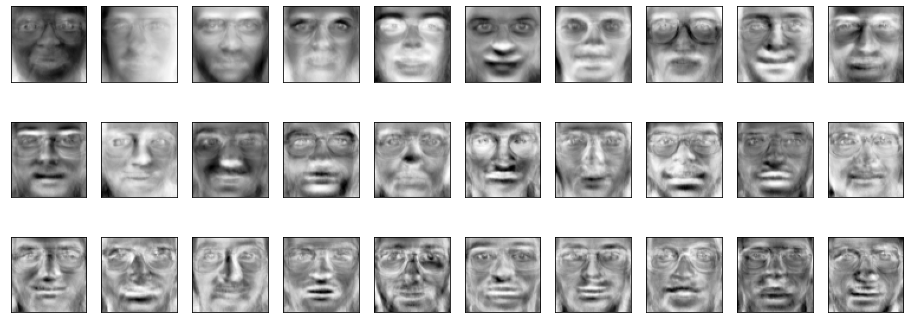

In [73]:
fig = plt.figure(figsize=(16,6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap='Greys_r')

(from scipy-lectures): We see that the first few components seem to primarily take care of lighting conditions; the remaining components pull out certain identifying features: the nose, eyes, eyebrows, etc.

# Project onto PCA basis

In [74]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 300)


In [75]:
print(X_test_pca.shape)

(100, 300)


# Several principal components

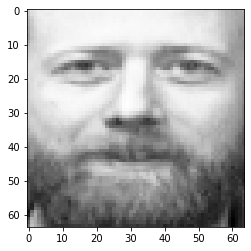

In [76]:
image_0 = X_train[0].reshape(faces.images[0].shape)
plt.imshow(image_0, cmap='Greys_r')  # original

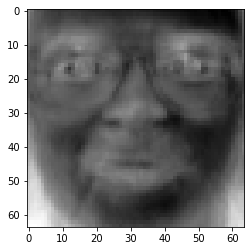

In [77]:
image_0_reconstructed = pca.singular_values_[0]*(pca.components_[0].reshape(faces.images[0].shape))
plt.imshow(image_0_reconstructed, cmap='Greys_r')

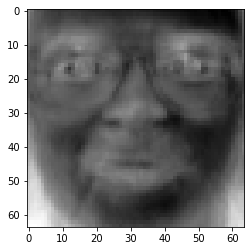

In [78]:
plt.imshow(image_0_reconstructed, cmap='Greys_r')

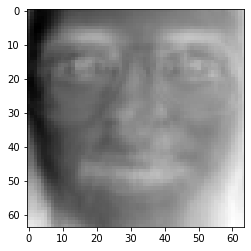

In [79]:
image_0_reconstructed = pca.singular_values_[0]*(pca.components_[0].reshape(faces.images[0].shape)) + pca.singular_values_[1]*(pca.components_[1].reshape(faces.images[1].shape))
plt.imshow(image_0_reconstructed, cmap='Greys_r')

In [84]:
#pca.singular_values_[1]*(pca.components_[1].reshape(faces.images[1].shape))

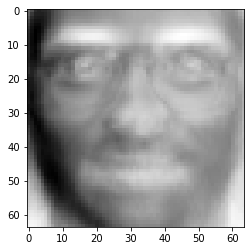

In [81]:
image_0_reconstructed = pca.singular_values_[0]*(pca.components_[0].reshape(faces.images[0].shape)) + \
                        pca.singular_values_[1]*(pca.components_[1].reshape(faces.images[1].shape)) + \
                        pca.singular_values_[2]*(pca.components_[2].reshape(faces.images[2].shape))
plt.imshow(image_0_reconstructed, cmap='Greys_r')

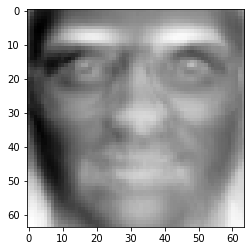

In [82]:
image_0_reconstructed = pca.singular_values_[0]*(pca.components_[0].reshape(faces.images[0].shape)) + \
                        pca.singular_values_[1]*(pca.components_[1].reshape(faces.images[1].shape)) + \
                        pca.singular_values_[2]*(pca.components_[2].reshape(faces.images[2].shape)) + \
                        pca.singular_values_[3]*(pca.components_[3].reshape(faces.images[3].shape))
plt.imshow(image_0_reconstructed, cmap='Greys_r')

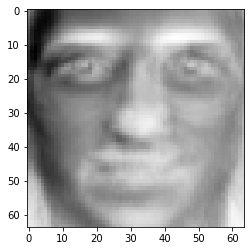

In [86]:
import numpy as np
image_0_reconstructed = np.zeros([64,64])
for i in range(300):
    image_0_reconstructed += pca.explained_variance_ratio_[i]*(pca.components_[i].reshape(faces.images[0].shape))

plt.imshow(image_0_reconstructed, cmap='Greys_r')